# Huesos

## Importación de librerias

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


## Definición de rutas

In [2]:
fracturados_train = r"C:\Users\David\PycharmProjects\first_project\Huesos\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\train\fractured"
fracturados_test = r"C:\Users\David\PycharmProjects\first_project\Huesos\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\test\fractured"
no_fracturados_train = r"C:\Users\David\PycharmProjects\first_project\Huesos\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\train\not fractured"
no_fracturados_test = r"C:\Users\David\PycharmProjects\first_project\Huesos\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\test\not fractured"

## Definición medidas

In [3]:
size = (200,200)

## Creación listas entrenamiento

In [139]:
imagenes_fracturados = {}
imagenes_no_fracturados = {}

In [140]:
x_train = []
x_test = []
y_train = []
y_test = []

Fracturado = 0 || No fracturado = 1

## Recorriendo directorio y añadiendo a las listas redimensionandolo

In [141]:
for i in os.listdir(fracturados_train):
    try:
        x_train.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(fracturados_train, i)), cv2.COLOR_BGR2GRAY), size)/255.0)
        y_train.append(0)
        imagenes_fracturados.update({i: cv2.imread(os.path.join(fracturados_train, i))})
    except:
        pass

In [142]:
for i in os.listdir(fracturados_test):
    try:
        x_test.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(fracturados_test, i)), cv2.COLOR_BGR2GRAY), size)/255.0)
        imagenes_fracturados.update({i: cv2.imread(os.path.join(fracturados_test, i))})
        y_test.append(0)
    except:
        print("error en fracturados test")

In [143]:
for i in os.listdir(no_fracturados_train):
    try:
        x_train.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(no_fracturados_train, i)), cv2.COLOR_BGR2GRAY), size)/255.0)
        imagenes_no_fracturados.update({i: cv2.imread(os.path.join(no_fracturados_train, i))})
        y_train.append(1)
    except:
        pass

In [144]:
for i in os.listdir(no_fracturados_test):
    try:
        x_test.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(no_fracturados_test, i)), cv2.COLOR_BGR2GRAY), size)/255.0)
        imagenes_no_fracturados.update({i: cv2.imread(os.path.join(no_fracturados_test, i))})
        y_test.append(1)
    except:
        print("error en no fracturados test")

In [145]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

9243 9243 506 506


## Imágenes no fracturados

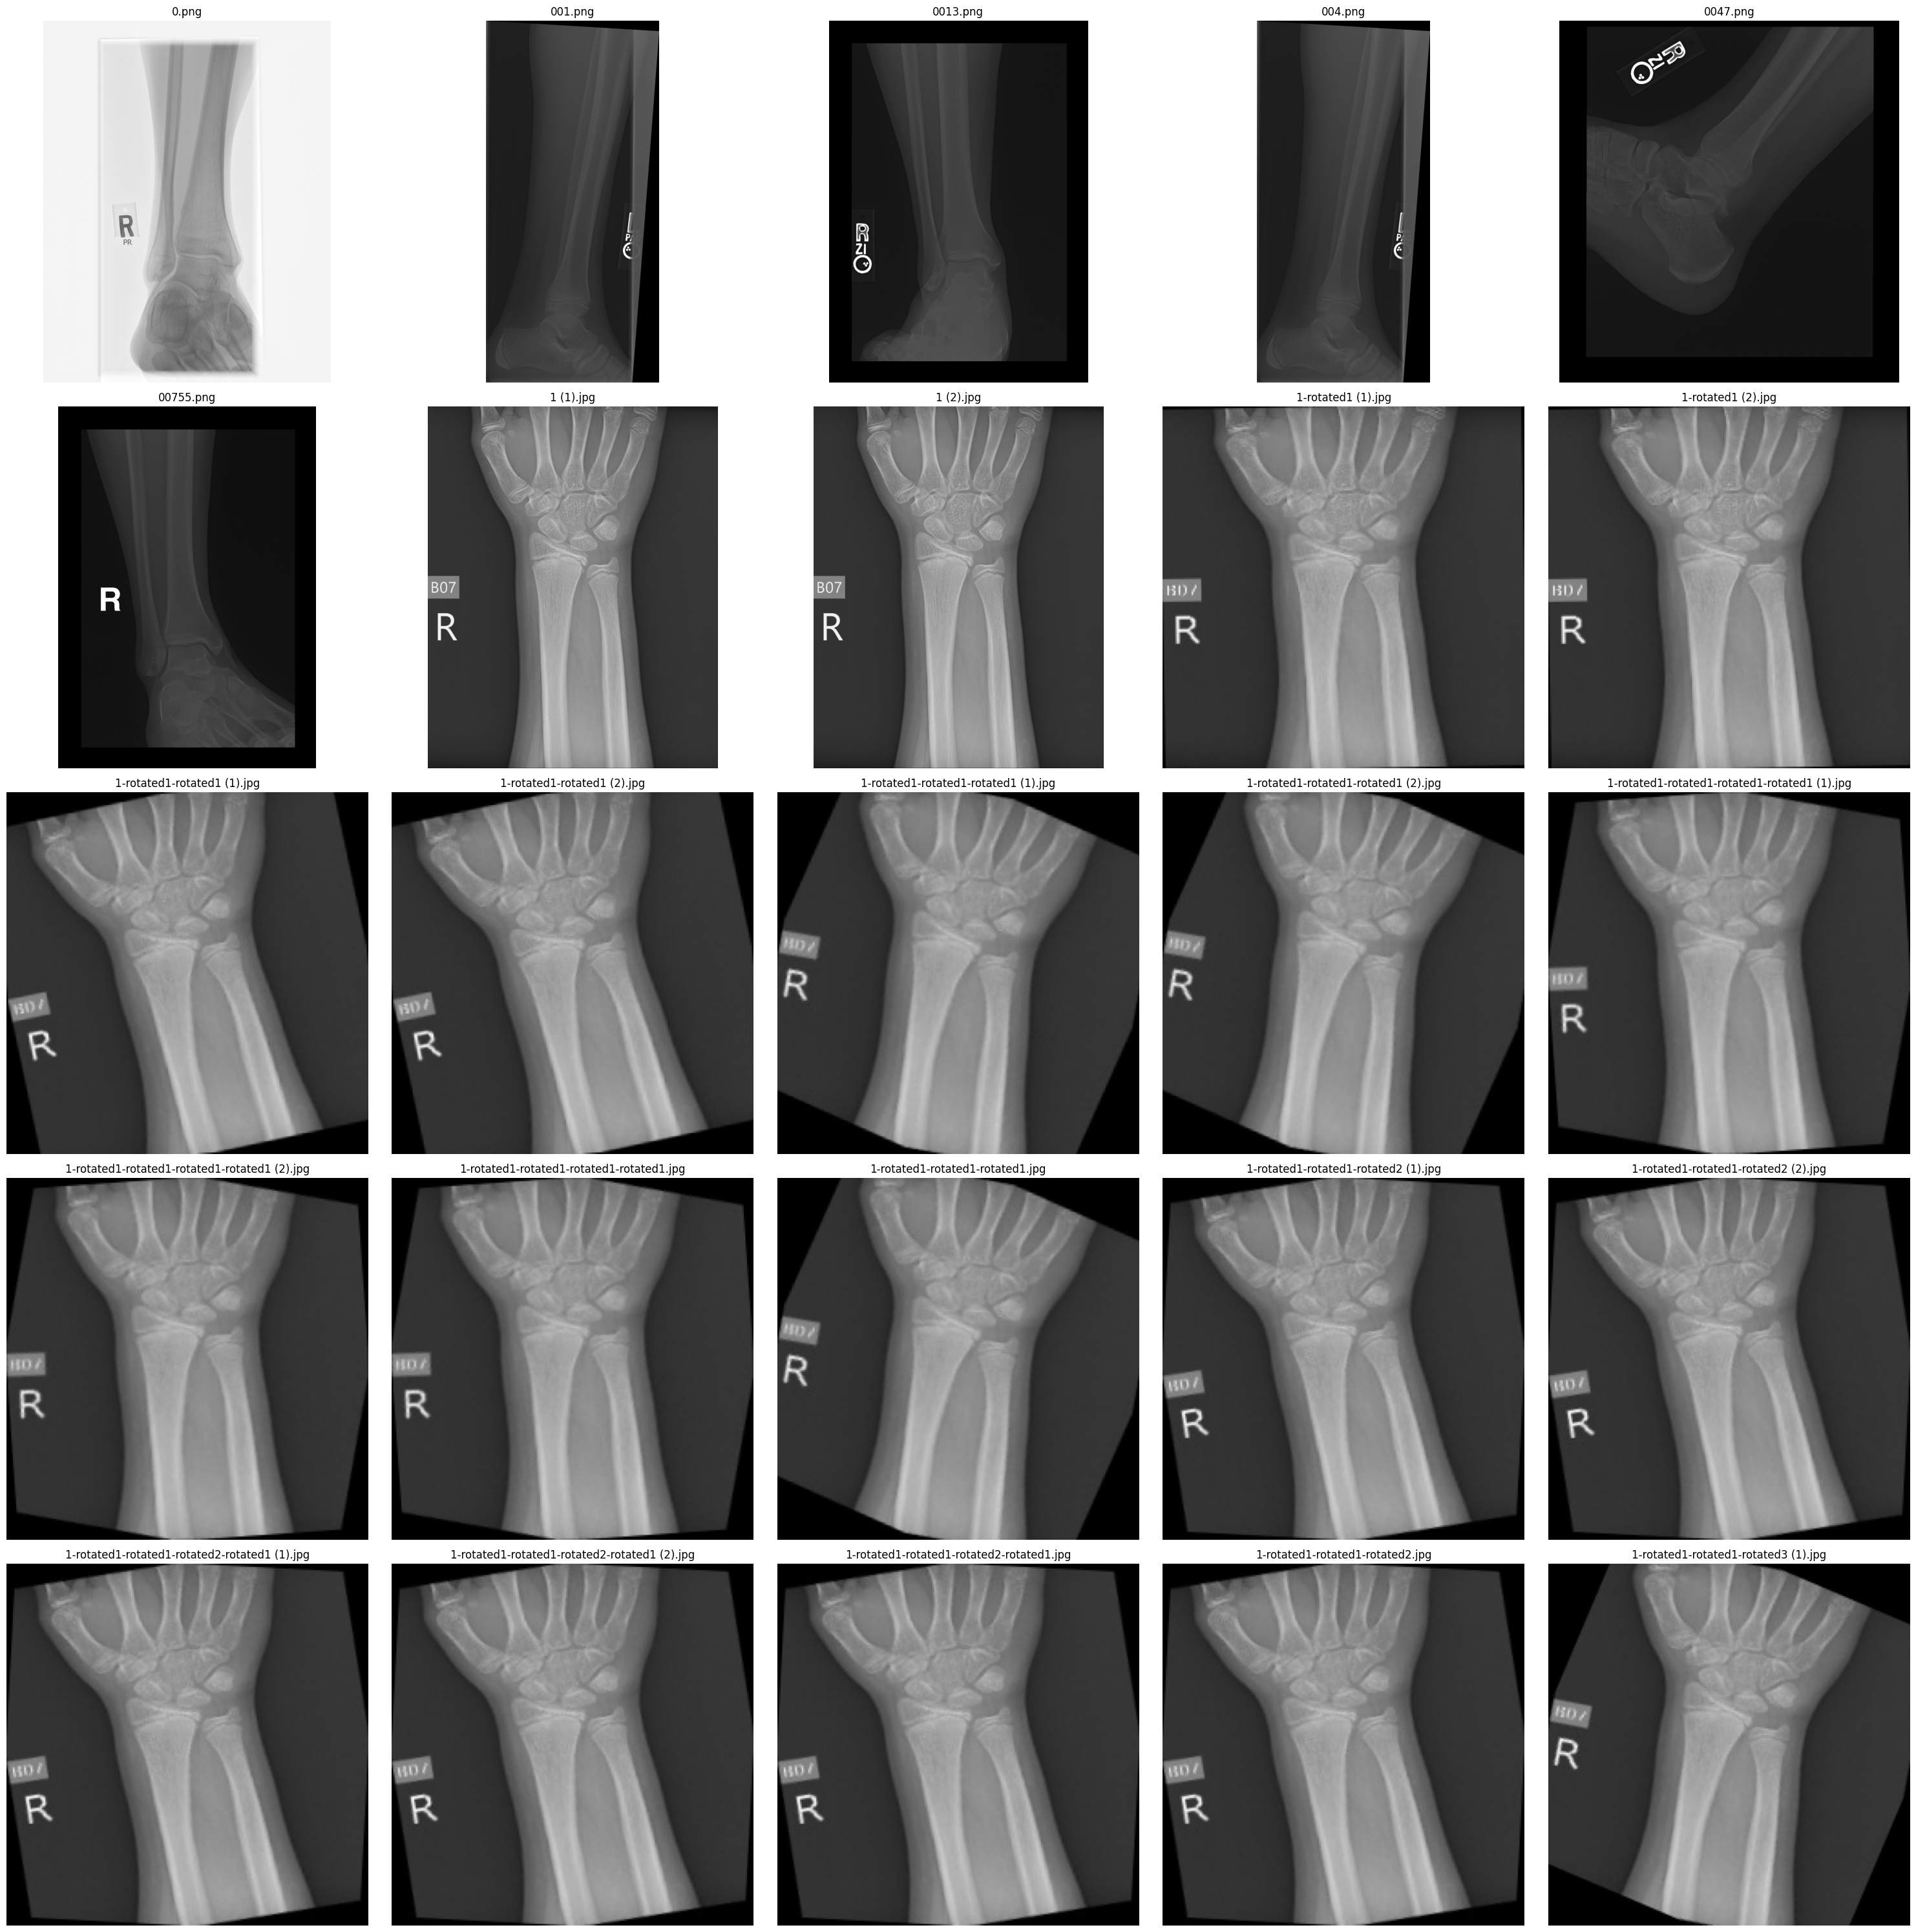

In [172]:
# Configuración de los subgráficos

numero_imagenes = 25
num_filas = numero_imagenes//5
num_columnas = 5
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(30, 30))
# Iterar sobre las imágenes y mostrarlas en los subgráficos
for i in range(numero_imagenes):
    axs[i//num_columnas][i%num_columnas].axis('off')  # Opcional: ocultar ejes
    axs[i//num_columnas][i%num_columnas].set_title(list(imagenes_no_fracturados.items())[i][0])
    axs[i // num_columnas][i % num_columnas].imshow(list(imagenes_no_fracturados.items())[i][1])

plt.tight_layout()
plt.show()


## Imágenes fracturados

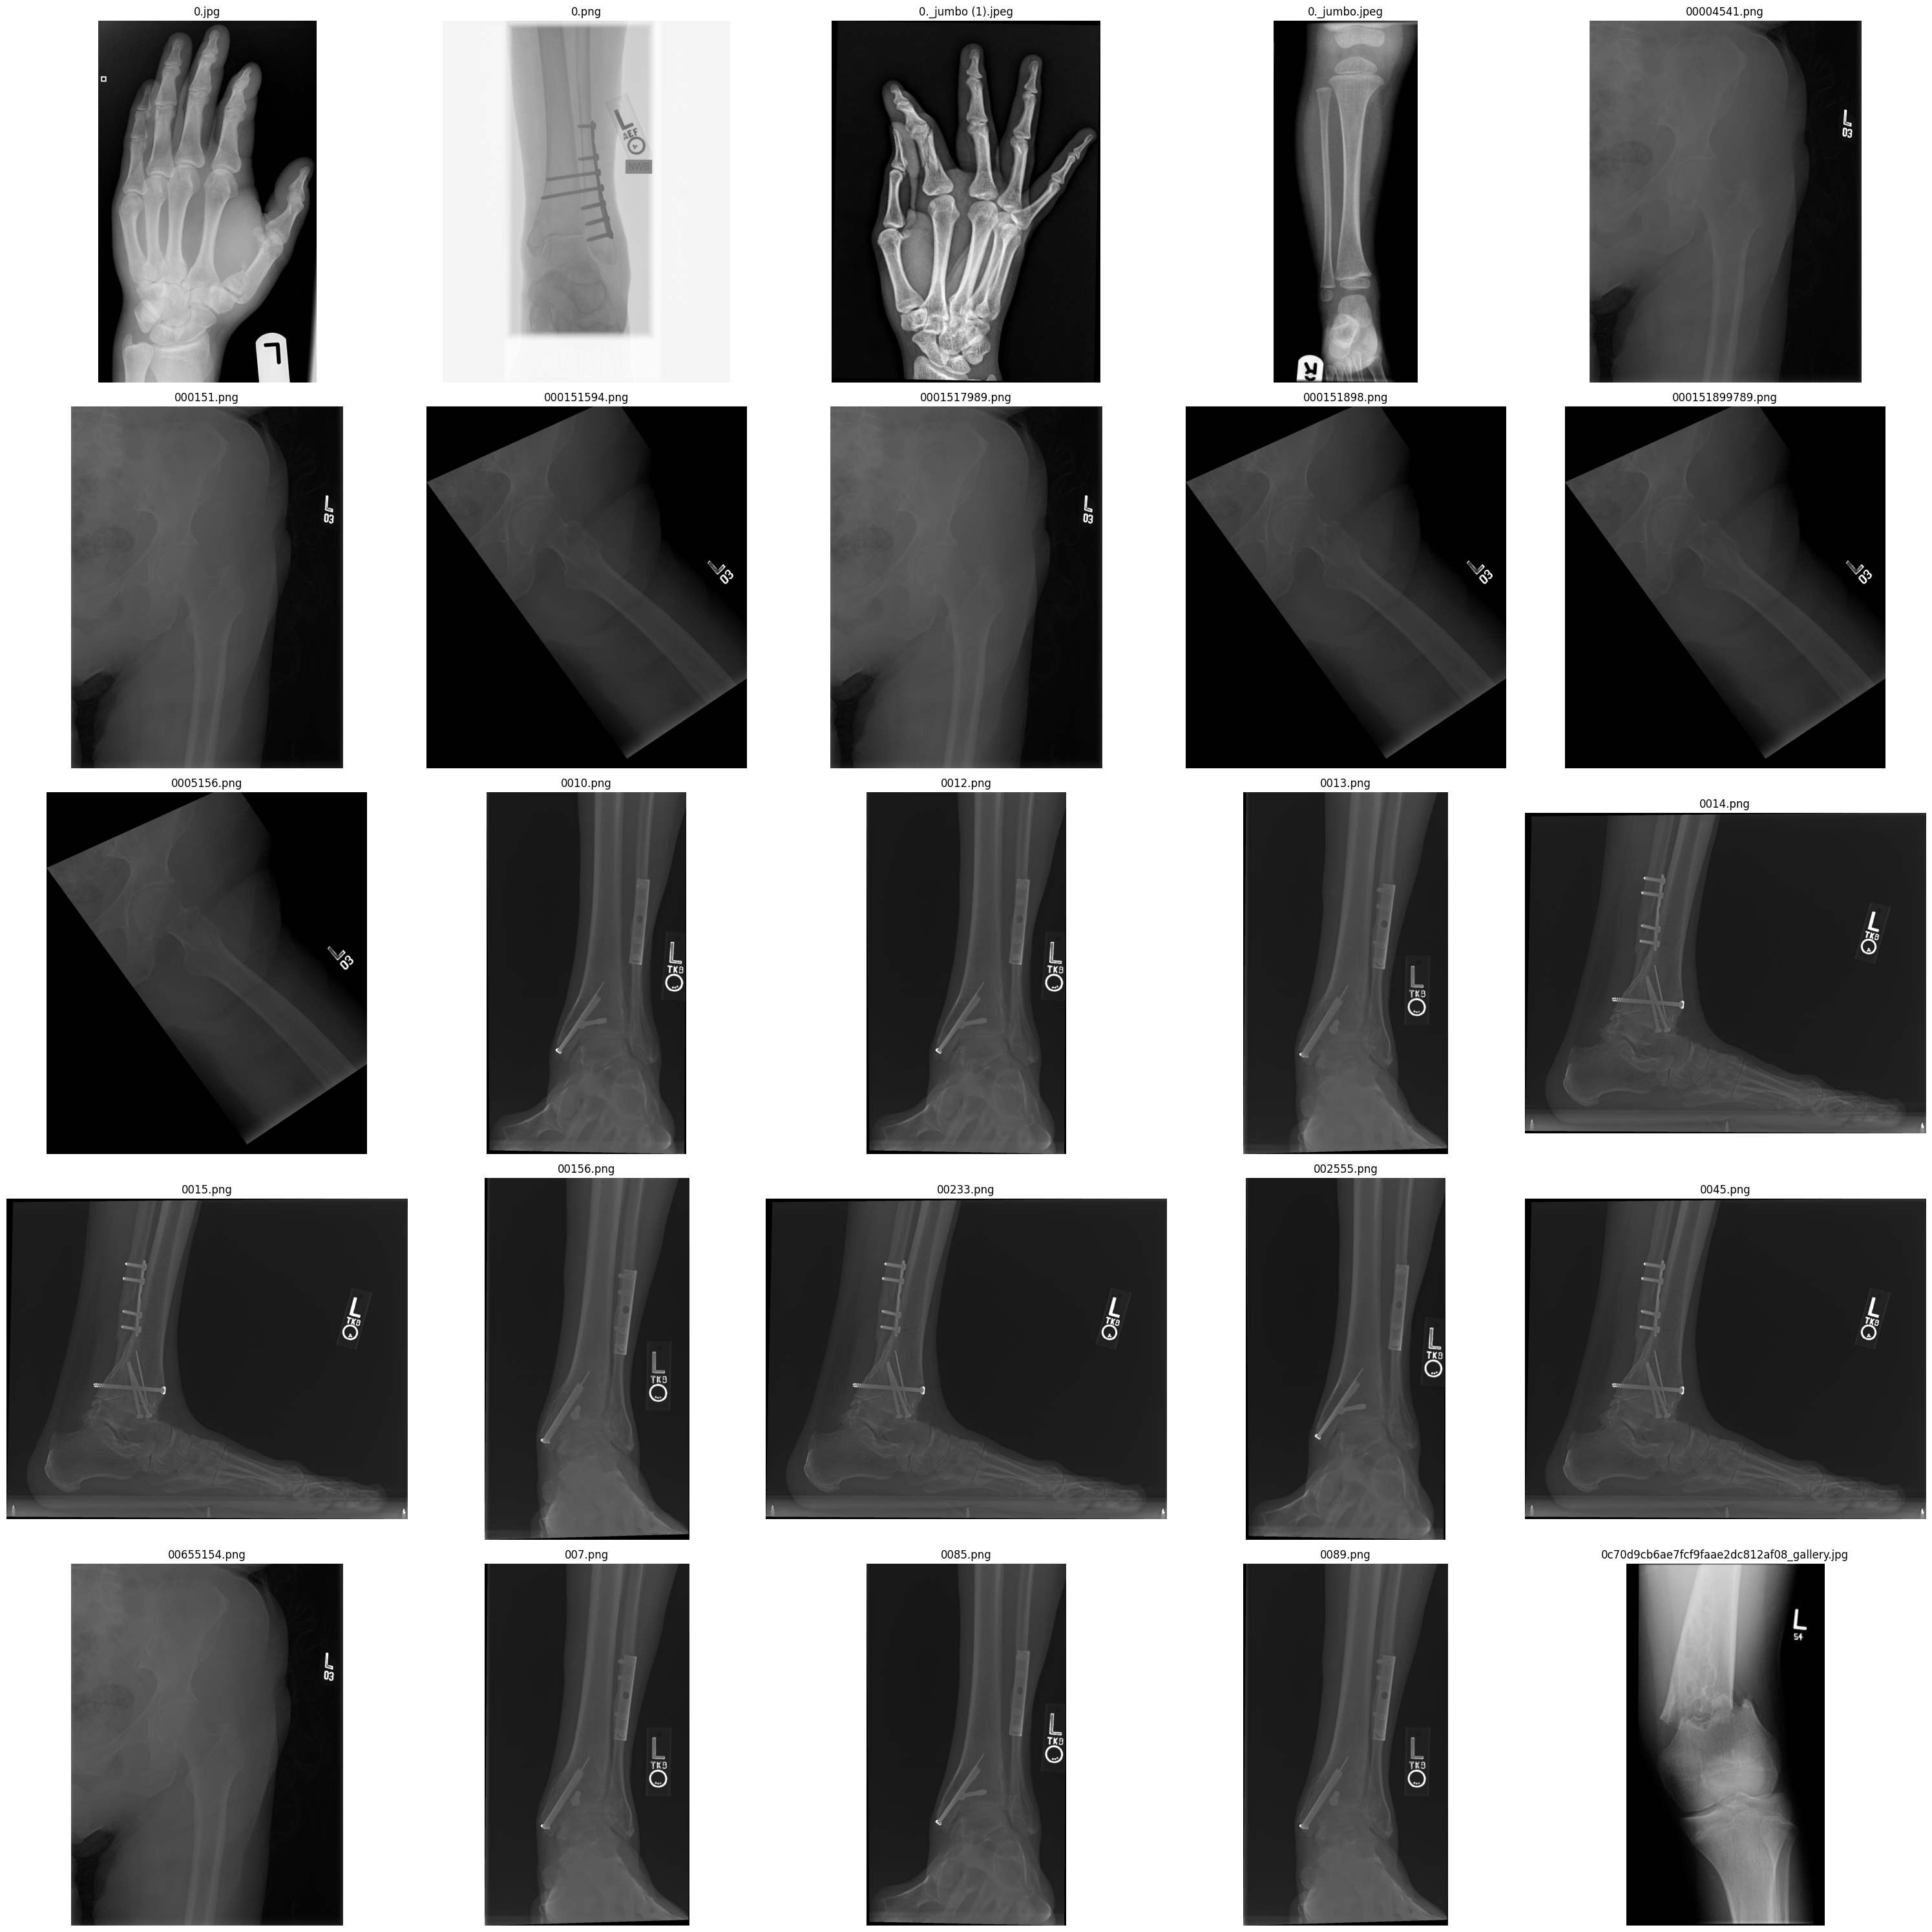

In [174]:
numero_imagenes = 25
num_filas = numero_imagenes//5
num_columnas = 5
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(30, 30))

for i in range(numero_imagenes):
    axs[i//num_columnas][i%num_columnas].axis('off')  # Opcional: ocultar ejes
    axs[i//num_columnas][i%num_columnas].set_title(list(imagenes_fracturados.items())[i][0])
    axs[i // num_columnas][i % num_columnas].imshow(list(imagenes_fracturados.items())[i][1])

plt.tight_layout()
plt.show()

## Conversión a arrays de numpy

In [80]:
x_train = np.array(x_train, dtype="float16")

In [81]:
# Asegurar que las imágenes estén en escala de grises y tengan una dimensión de canal
x_train = x_train.reshape(-1, 200, 200, 1)

In [82]:
y_train = np.array(y_train, dtype = "float16")

In [83]:
x_test = np.array(x_test, dtype = "float16")

In [84]:
# Asegurar que las imágenes estén en escala de grises y tengan una dimensión de canal
x_test = x_test.reshape(-1,200, 200, 1)

In [85]:
y_test = np.array(y_test, dtype = "float16")

In [86]:
print(x_train.shape, y_train.shape)

(9243, 200, 200, 1) (9243,)


In [87]:
print(x_test.shape, y_test.shape)

(506, 200, 200, 1) (506,)


## Creación de modelo

In [120]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(200, 200, 1), dtype=tf.float16),
    tf.keras.layers.Conv2D(32,3, activation = "relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32,3, activation = "relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32,3, activation = "relu", name="ultima_convolucional"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(68, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax")                  
])

In [121]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

## Barajar los datos

In [122]:
# Combinar x_train y y_train en un solo conjunto de datos
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Barajar los datos
dataset = dataset.shuffle(buffer_size=len(x_train))
dataset_preprocesado = dataset.batch(32).repeat(5)

## Entrenamiento de modelo

In [123]:
history = model.fit(dataset_preprocesado, epochs=5, steps_per_epoch=len(x_train) // 32)

Epoch 1/5
288/288 ━━━━━━━━━━━━━━━━━━━━ 136s 445ms/step - accuracy: 0.7381 - loss: 0.4894
Epoch 2/5
288/288 ━━━━━━━━━━━━━━━━━━━━ 127s 441ms/step - accuracy: 0.9758 - loss: 0.0779
Epoch 3/5
288/288 ━━━━━━━━━━━━━━━━━━━━ 127s 442ms/step - accuracy: 0.9907 - loss: 0.0295
Epoch 4/5
288/288 ━━━━━━━━━━━━━━━━━━━━ 123s 426ms/step - accuracy: 0.9944 - loss: 0.0183
Epoch 5/5
288/288 ━━━━━━━━━━━━━━━━━━━━ 121s 420ms/step - accuracy: 0.9991 - loss: 0.0040


In [124]:
model.evaluate(x_test, y_test)
prediction = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9765 - loss: 0.0688
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


## Pruebas de shape

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)
print(dataset)

(5036, 200, 200, 1)
(5036,)
(276, 100, 100, 1)
(69,)
float16
float16
float16
float16
<_ShuffleDataset element_spec=(TensorSpec(shape=(200, 200, 1), dtype=tf.float16, name=None), TensorSpec(shape=(), dtype=tf.float16, name=None))>


## Probar datos

In [125]:
print(prediction[235:280])
print(np.argmax(prediction[235:280], axis=1))
print(y_test[235:280])

[[1.0000000e+00 5.0968496e-10]
 [1.0000000e+00 2.7707199e-09]
 [1.0000000e+00 1.0501773e-09]
 [1.0761933e-02 9.8923802e-01]
 [2.5947557e-03 9.9740523e-01]
 [4.0932936e-03 9.9590671e-01]
 [2.5947557e-03 9.9740523e-01]
 [2.8712282e-06 9.9999714e-01]
 [1.6944166e-05 9.9998307e-01]
 [1.5759630e-11 1.0000000e+00]
 [2.3510027e-10 1.0000000e+00]
 [2.7363516e-09 1.0000000e+00]
 [3.7950789e-09 1.0000000e+00]
 [3.8849335e-10 1.0000000e+00]
 [2.9743591e-08 1.0000000e+00]
 [8.7532410e-03 9.9124676e-01]
 [7.2323671e-09 1.0000000e+00]
 [2.4445052e-07 9.9999976e-01]
 [1.3510083e-06 9.9999869e-01]
 [2.9298883e-08 1.0000000e+00]
 [8.7532364e-03 9.9124676e-01]
 [8.7532410e-03 9.9124676e-01]
 [2.5947557e-03 9.9740523e-01]
 [3.8393549e-07 9.9999964e-01]
 [2.6537813e-07 9.9999976e-01]
 [9.8360368e-05 9.9990165e-01]
 [7.5670891e-06 9.9999249e-01]
 [1.5115251e-10 1.0000000e+00]
 [2.8281385e-04 9.9971718e-01]
 [8.6998347e-10 1.0000000e+00]
 [7.1254433e-09 1.0000000e+00]
 [7.3424089e-05 9.9992657e-01]
 [6.6795

## Creación de gráficos

In [105]:
def count(array, value):
    # Contar los elementos que coinciden con el valor dado
    return np.count_nonzero(array == value)

In [112]:
print(count(np.argmax(prediction, axis=1), 0))
print(count(y_test, 0.))
print(count(np.argmax(prediction, axis=1), 1))
print(count(y_test, 1.))

248
238
258
268


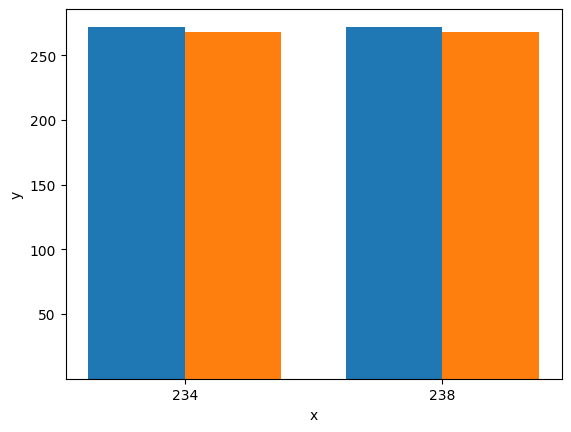

In [126]:
import matplotlib.pyplot as plt
import numpy as np

data = []

data.append((count(np.argmax(prediction, axis=1), 0), count(np.argmax(prediction, axis=1), 1)))
data.append((count(y_test, 0.), count(y_test, 1.)))
# Calcular el número de barras y el ancho de cada barra
num_barras = len(data)
w = 0.75
dimw = w / num_barras

fig, ax = plt.subplots()
x = np.arange(len(data))

# Iterar sobre las barras
for i, (x_value, y_value) in enumerate(data):
    # Posicionar y crear la barra
    b = ax.bar(x + i * dimw, [y_value], dimw, bottom=0.001, label=f'roto={x_value}, no roto={y_value}')

# Establecer las etiquetas de los ticks del eje x
ax.set_xticks(x + dimw * (num_barras - 1) / 2)
ax.set_xticklabels([f'{x_value}' for x_value, _ in data])

# Establecer la escala del eje y como linear
ax.set_yscale('linear')

# Establecer etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')


# Mostrar el gráfico
plt.show()

Primer gráfico es de las predicciones y el segundo gráfico es de los valores reales
Azul = roto || Naranja = no roto

In [128]:
ultima_capa_convolucional = model.get_layer('ultima_convolucional')

In [129]:
activaciones = ultima_capa_convolucional.predict(x_train[0])

AttributeError: 'Conv2D' object has no attribute 'predict'

In [ ]:
print(activaciones.shape)